In [1]:
import sys
import os
import numpy as np
# TEMPORARY FIX for KMP_DUPLICATE_LIB_OK error
os.environ['KMP_DUPLICATE_LIB_OK']='True'
current_dir = os.getcwd()
ROOT = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(ROOT)

from modules.solver.origami import RigidFoldableStructure
from modules.solver.kinematics import Kinematics
from modules.solver.util import pattern_visualizer, load_rfs_artifact_npz

In [2]:
info = load_rfs_artifact_npz("../data/import/TMP/tachi_miura_polyhedron.npz")
pattern = RigidFoldableStructure(
    vert=info["V"], edge=info["E"], face=info["F"], connection = info["C"])

[*] Loaded artifact <- ../data/import/TMP/tachi_miura_polyhedron.npz
[*] Sheet Signs Generated: [1, 1]


(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'RFS Pattern Visualization'}, xlabel='X', ylabel='Y', zlabel='Z'>)

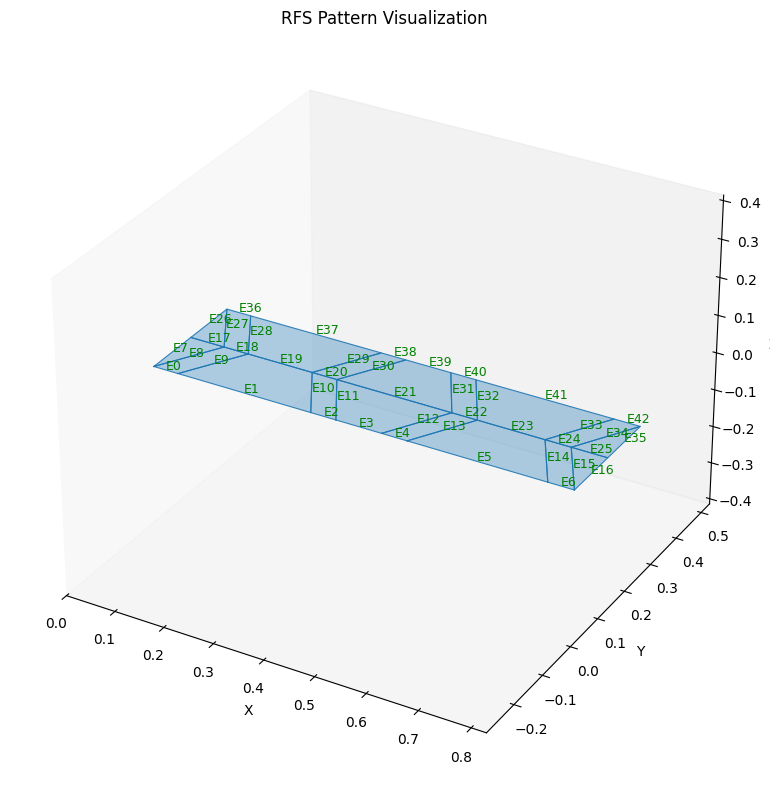

In [3]:
pattern_visualizer(pattern, sheets = [0], show_vertices = False, show_edges = True, show_faces = False)

In [5]:
kinematics = Kinematics(pattern, k_raw = info["k_stiffness_raw"], 
                        theta_init_raw = info["theta_init_raw"], 
                        theta_equil_raw = info["theta_neutral_raw"], 
                        face_colors = info["face_colors"], reference_frame= info["reference_frame"])
kinematics.step_size_threshold = 1e-3
kinematics.residual_threshold = 1e-16*7
kinematics.max_diff_threshold = 1e-3
kinematics.init_step_size = np.pi/180
angle_history_raw = kinematics._find_equilibrium_trajectory()

Processed iteration 600/5000, c = 1.091e-03, max_diff(deg) = 2.56, dof = 111
Converged: Max difference to target equilibrium (1.82e-05) is less than tolerance max_diff_threshold (1.00e-03).

Converged to equilibrium angles.


Processing 640 iterations and interpolating to 200 frames.
Exporting results... | fps: 30, play_speed: 1.0


c:\Python\repo_py\git\Simulator_for_RigidFoldableStructures\venv_311\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


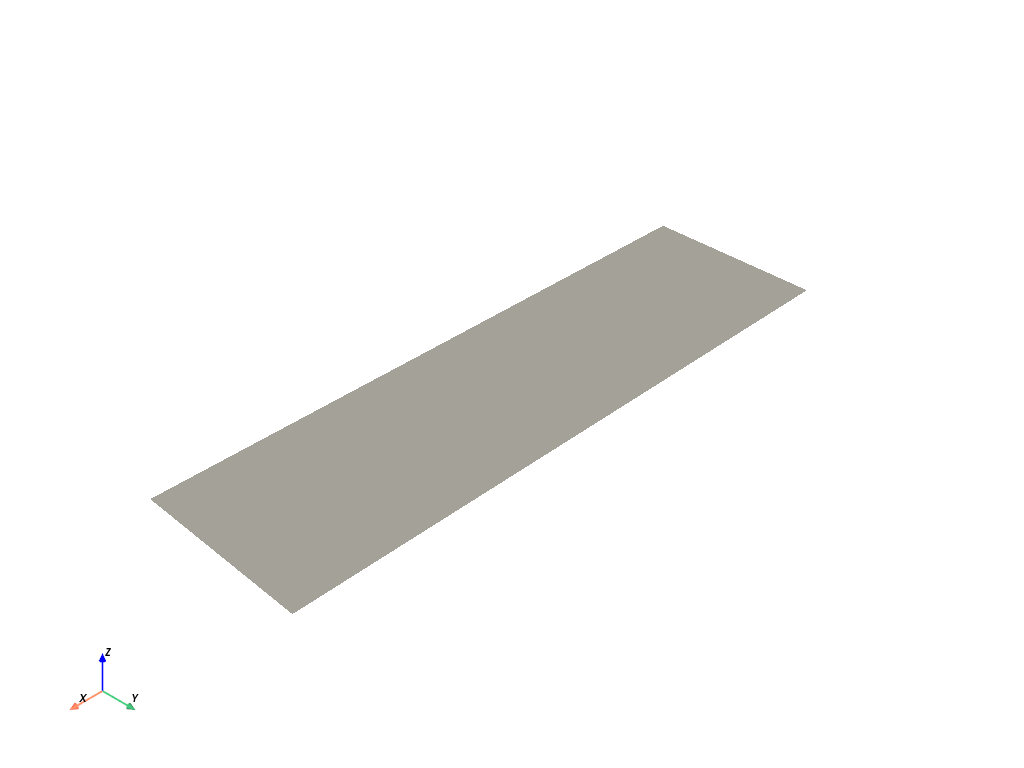

Done.


In [6]:
ply_path = '../data/visualization_result/TMP/tachi_miura_poly.vtp'
npy_path = '../data/visualization_result/TMP/tachi_miura_poly.npy'
gif_path = None # '../data/visualization_result/TMP/tachi_miura_poly.gif'
vtk_path = None # '../data/visualization_result/TMP/tachi_miura_poly'
kinematics.export_trajectory(ply_path=ply_path, npy_path=npy_path, gif_path=gif_path, vtk_path = vtk_path, show_base=True)